# Chapter 4 Analysis of Variance
     

## 4.2 Two-way ANOVA

### 4.2.7 Example: Hay Fever data

Let's return to the Hay Fever data. If an analysis plan has been determined, as is usually the case for randomized control trials, we need to strictly follow the analysis plan. The pre-determined analysis plan makes sure that there won't be data mining attempts that inflates the type I errors.  

In this example, we will pretend that we have no such plans. Our task is to explore and investigate the effectiveness of the two ingradients. We still, however, need to be mindful with type I errors from our inference. Think about the type I error as what determines the *weight* your results carry: the larger the type I error is, the more negligible your statistical inference is. 

There are two factors with a total of 9 combinations in this data with 36 samples. It is natural to consider a two-way ANOVA model here. Among the many assumptions for an ANOVA model, the major assumption that we want to check before our analysis is whether the interactions exist or not. We shall still examine the rest of the assumptions (normaility, equal variance, etc.) in the model diagnostics or sensitivity analysis. The analysis stategy is shown in the following cells. 


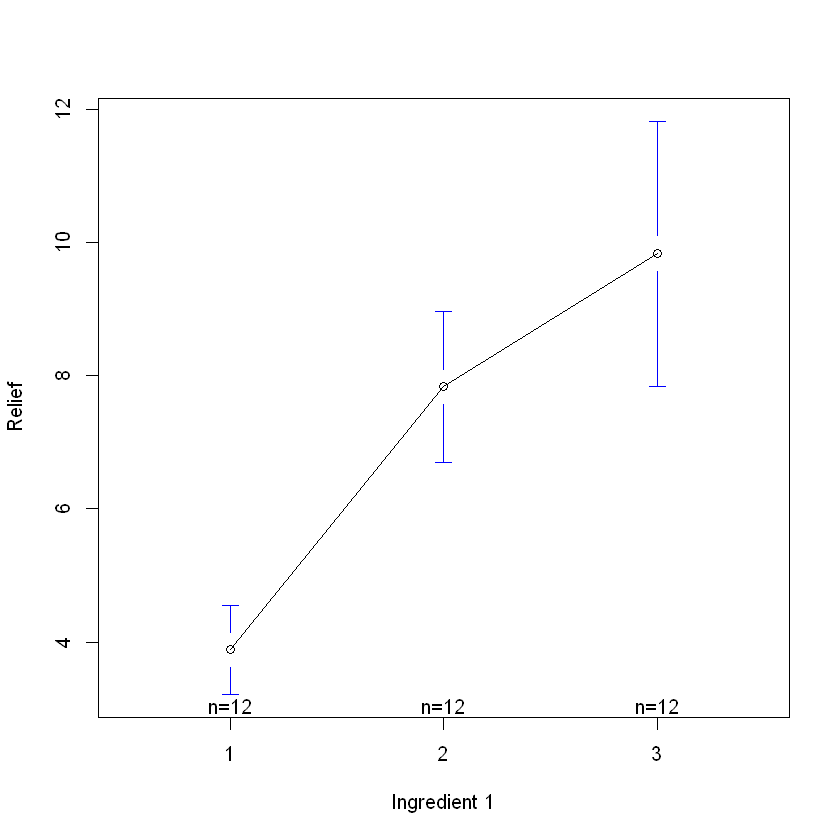

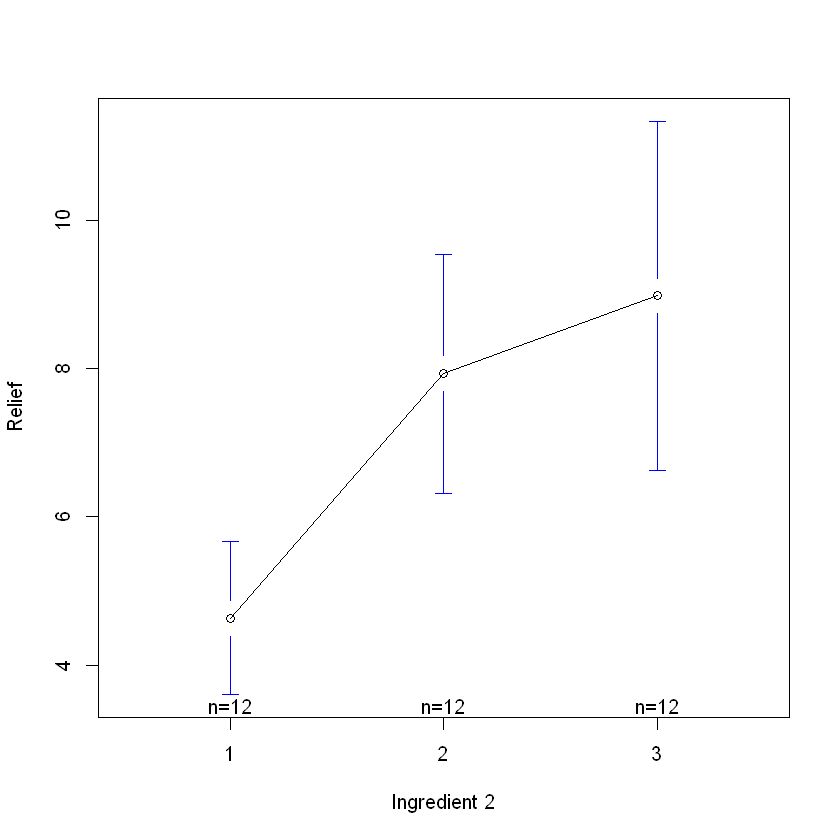

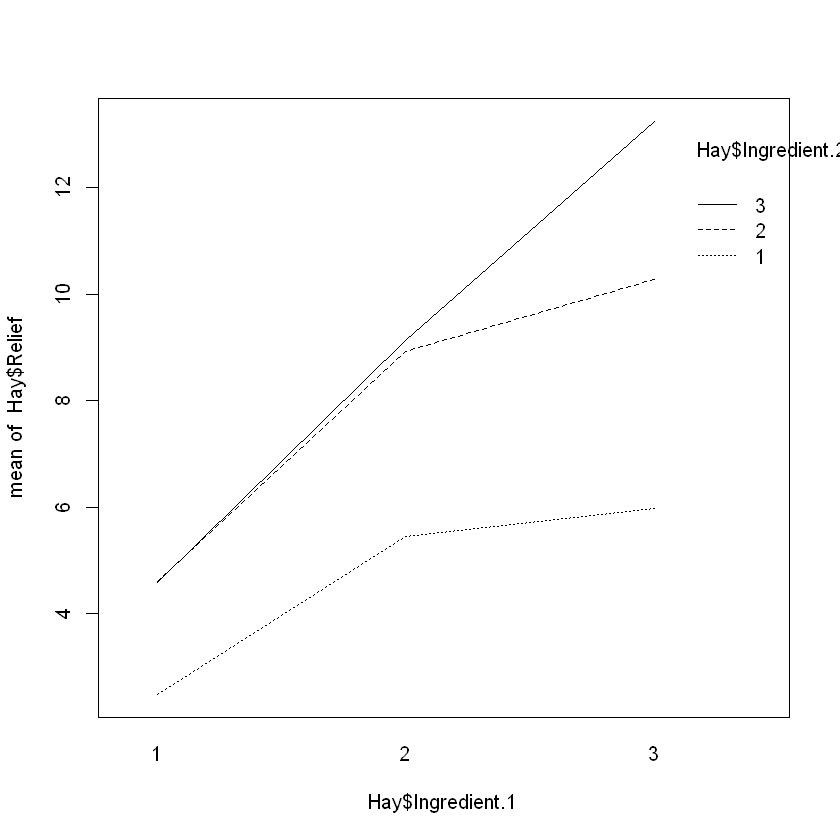

In [25]:
Hay<-read.csv(file="../Data/HayFever.csv",header=TRUE,sep=",")
library(gplots)

plotmeans(Relief~Ingredient.1, data=Hay, xlab="Ingredient 1")

plotmeans(Relief~Ingredient.2, data=Hay, xlab="Ingredient 2")

interaction.plot(Hay$Ingredient.1, Hay$Ingredient.2, Hay$Relief)

In [29]:
full_model = lm(Relief~as.factor(Ingredient.1)+as.factor(Ingredient.2)+as.factor(Ingredient.1)*as.factor(Ingredient.2), data=Hay)
reduced_model = lm(Relief~as.factor(Ingredient.1)+as.factor(Ingredient.2), data=Hay)
anova(reduced_model,full_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,31,31.050,NA,NA,NA,NA
2,27,1.625,4,29.425,122.2269,6.972083e-17


In [31]:
anova.fit <- aov(Relief~as.factor(Ingredient.1)+as.factor(Ingredient.2)+as.factor(Ingredient.1)*as.factor(Ingredient.2), data=Hay)
anova.fit

Call:
   aov(formula = Relief ~ as.factor(Ingredient.1) + as.factor(Ingredient.2) + 
    as.factor(Ingredient.1) * as.factor(Ingredient.2), data = Hay)

Terms:
                as.factor(Ingredient.1) as.factor(Ingredient.2)
Sum of Squares                  220.020                 123.660
Deg. of Freedom                       2                       2
                as.factor(Ingredient.1):as.factor(Ingredient.2) Residuals
Sum of Squares                                           29.425     1.625
Deg. of Freedom                                               4        27

Residual standard error: 0.2453267
Estimated effects may be unbalanced

In [32]:
?TukeyHSD

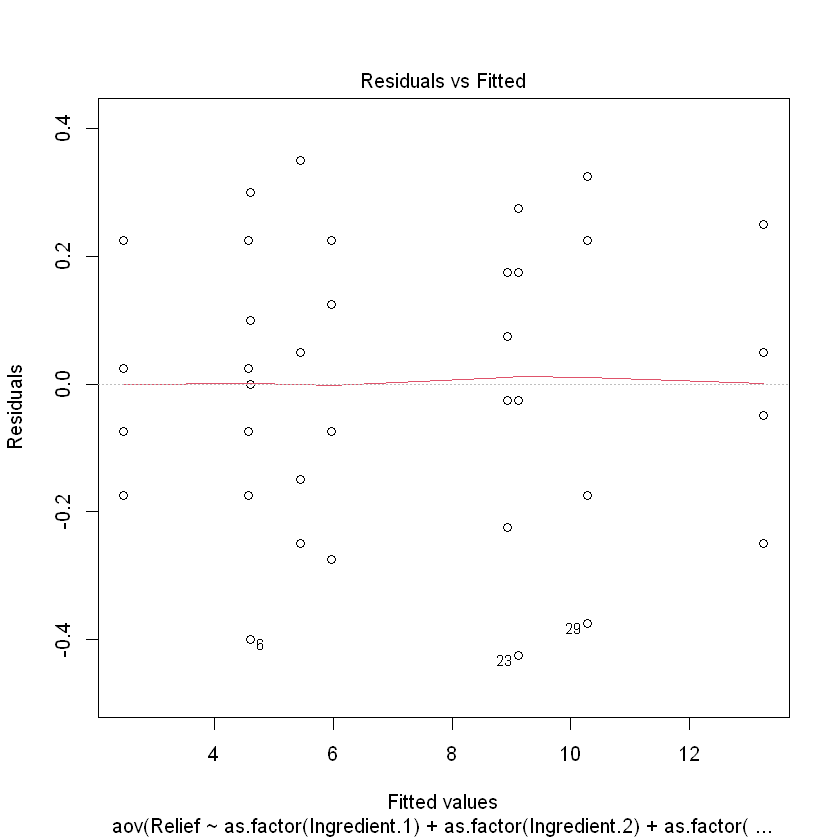

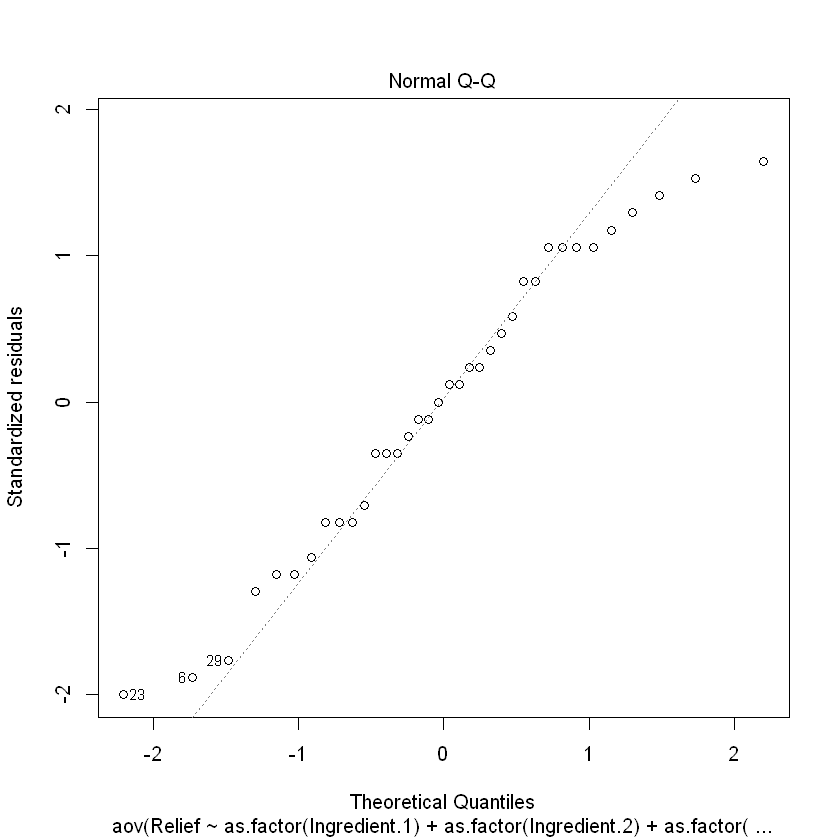

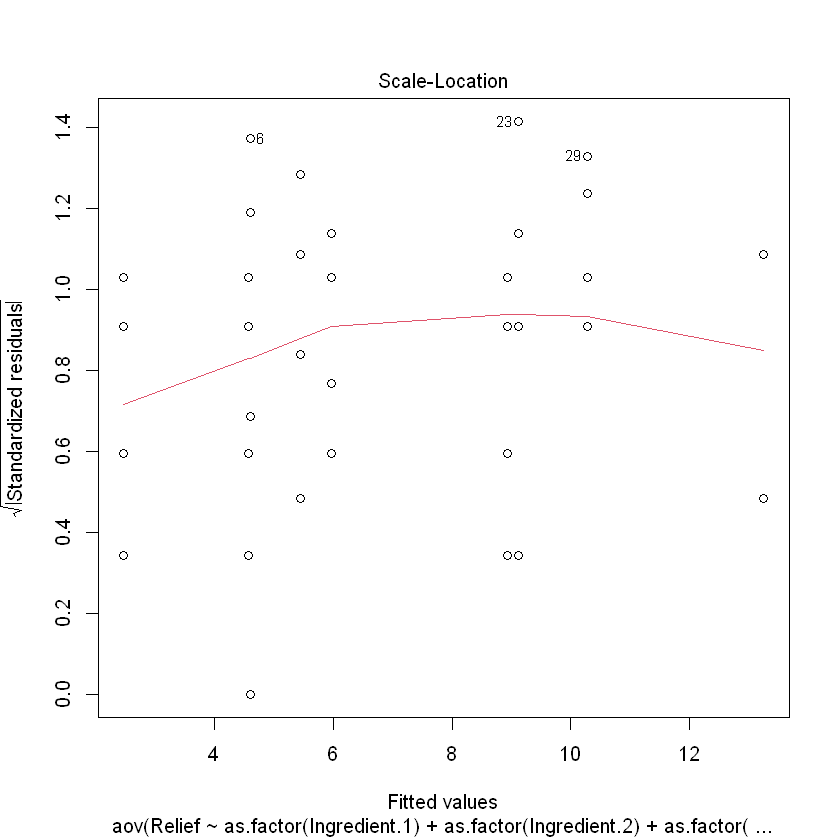

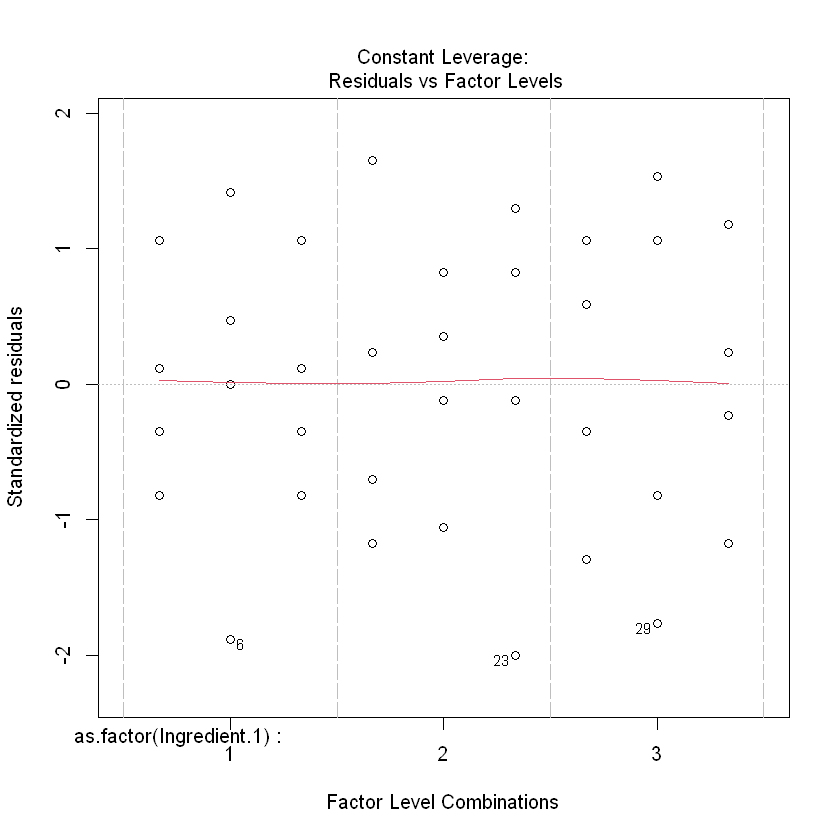

In [33]:
plot(anova.fit)